/Users/karen/Desktop/CS527/Bio-Inspired/CS527-420-Project/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


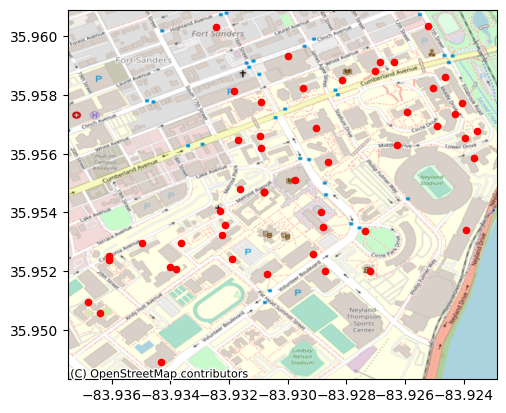

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd
from math import radians, cos, sin, asin, sqrt

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

long =[-83.9290300, -83.9259200, -83.9246300, -83.9263900, -83.9281400, -83.9268700,-83.9270100,-83.9294600,-83.9308100,-83.9321400,-83.9318800,-83.9336300,-83.9308100,-83.9273600,-83.9272100,-83.9343200,-83.9308100,-83.9297600,-83.9236600,-83.9240700,-83.9291300,-83.9307200,-83.9323000,-83.9288100,-83.9288600,-83.9286400,-83.9239190,-83.9252087,-83.9262703,-83.9338035,-83.9249062,-83.9250586,-83.9368156,-83.9235339,-83.9318294,-83.9322423,-83.9360961,-83.9309058,-83.9316165,-83.9317006,-83.9324349,-83.9363971,-83.9309273,-83.9239745,-83.9349595, -83.9360853, -83.9340153, -83.9242898, -83.9287277, -83.9300016, -83.9309214]
lat = [35.9568900,35.9574100,35.9586000,35.9591400,35.9585300,35.9591400,35.9588300,35.9582400,35.9547100,35.9535800,35.9524000,35.9529600,35.9547100,35.9533600,35.9520000,35.9488900,35.9547100,35.9550900,35.9558700,35.9577200,35.9526000,35.9519200,35.9540600,35.9535100,35.9540200,35.9557100,35.9534200,35.9603369,35.9562900,35.9520768,35.9569510,35.9582465,35.9509597,35.9567925,35.9581388,35.9532492,35.9523728,35.9561918,35.9547879,35.9564855,35.9603134,35.9505688,35.9565956,35.9565472,35.9529485,35.9525031,35.9521321,35.9573676,35.9520077,35.9593454,35.9577538]
geometry = [Point(xy) for xy in zip(long,lat)]

shape_file = "boundary.shp"
ward = gpd.read_file(shape_file, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry, crs = 4326)

# Plot boundary
ax = ward.plot(alpha=0.35, color='#d66058', zorder=1, aspect='equal')
# ax = gpd.GeoSeries(ward['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)

# Plot buildings
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red') #, marker = '*') 
ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [9]:
# Calculates distance between two coordinates
def distance(lat1, long1, lat2, long2):
     
    # Converts decimal degrees to radians
    long1 = radians(long1)
    long2 = radians(long2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    # Radius of earth in miles
    r = 3956
      
    # Haversine formula
    h = sin((lat2 - lat1)/ 2)**2 + cos(lat1) * cos(lat2) * sin((long2 - long1)/ 2)**2
 
    dist = 2 * r * asin(sqrt(h))

    return dist
    
# test code
# lat1 = 53.32055555555556
# lat2 = 53.31861111111111
# long1 = -1.7297222222222221
# long2 =  -1.6997222222222223
# print(distance(lat1, lat2, long1, long2), "miles")

In [10]:
data = {'lat': [35.9568900,35.9574100,35.9586000,35.9591400,35.9585300,35.9591400,35.9588300,35.9582400,35.9547100,35.9535800,35.9524000,35.9529600,35.9547100,35.9533600,35.9520000,35.9488900,35.9547100,35.9550900,35.9558700,35.9577200,35.9526000,35.9519200,35.9540600,35.9535100,35.9540200,35.9557100,35.9534200,35.9603369,35.9562900,35.9520768,35.9569510,35.9582465,35.9509597,35.9567925,35.9581388,35.9532492,35.9523728,35.9561918,35.9547879,35.9564855,35.9603134,35.9505688,35.9565956,35.9565472,35.9529485,35.9525031,35.9521321,35.9573676,35.9520077,35.9593454,35.9577538],
        'long': [-83.9290300, -83.9259200, -83.9246300, -83.9263900, -83.9281400, -83.9268700,-83.9270100,-83.9294600,-83.9308100,-83.9321400,-83.9318800,-83.9336300,-83.9308100,-83.9273600,-83.9272100,-83.9343200,-83.9308100,-83.9297600,-83.9236600,-83.9240700,-83.9291300,-83.9307200,-83.9323000,-83.9288100,-83.9288600,-83.9286400,-83.9239190,-83.9252087,-83.9262703,-83.9338035,-83.9249062,-83.9250586,-83.9368156,-83.9235339,-83.9318294,-83.9322423,-83.9360961,-83.9309058,-83.9316165,-83.9317006,-83.9324349,-83.9363971,-83.9309273,-83.9239745,-83.9349595, -83.9360853, -83.9340153, -83.9242898, -83.9287277, -83.9300016, -83.9309214]}

df = pd.DataFrame(data)

distance_matrix = pd.DataFrame(index=df.index, columns=df.index)

for i in range(len(df)):
    for j in range(len(df)):
        distance_matrix.iloc[i,j] = distance(df['lat'][i], df['long'][i], df['lat'][j], df['long'][j])

print(distance_matrix)

          0         1         2         3         4         5         6   \
0        0.0  0.177485  0.272785  0.214252  0.123678  0.196742  0.175178   
1   0.177485       0.0   0.10931  0.122302  0.146199  0.130717  0.115428   
2   0.272785   0.10931       0.0  0.105192  0.196227  0.130623  0.133958   
3   0.214252  0.122302  0.105192       0.0  0.106487  0.026826  0.040728   
4   0.123678  0.146199  0.196227  0.106487       0.0  0.082533  0.066464   
5   0.196742  0.130717  0.130623  0.026826  0.082533       0.0  0.022789   
6   0.175178  0.115428  0.133958  0.040728  0.066464  0.022789       0.0   
7   0.096259  0.205978  0.271082  0.182482  0.076441  0.157525  0.142857   
8   0.180424  0.330828  0.437536  0.393168  0.303041   0.37689  0.355002   
9    0.28713  0.436786  0.544345  0.500648  0.408397  0.483865  0.462171   
10  0.348541  0.480229  0.589443  0.557416   0.47205  0.543111  0.520755   
11  0.373803  0.529237  0.636132  0.588055  0.491988  0.569927  0.548779   
12  0.180424